In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Debugging Circuit Waveform Response

## Signal from Photodiodes

In [5]:
file_loc = 'data/2024-05-22 103710 Photodiode nodes.txt'
pd_data = pd.read_csv(file_loc, sep='\t', header=0)

In [6]:
pd_data

,time,Ix(U2:Ano),Ix(U3:Cath)
0,0.000000e+00,-1.664489e-13,-1.622546e-12
1,1.621429e-10,-2.028529e-09,1.863624e-09
2,3.242857e-10,-5.589140e-09,5.190984e-09
3,4.864286e-10,-1.068200e-08,9.980460e-09
4,6.485714e-10,-1.730711e-08,1.623205e-08
...,...,...,...
1254,9.972664e-06,-1.006164e-09,-1.363209e-09
1255,9.982904e-06,-9.708563e-10,-1.315423e-09
1256,9.993144e-06,-9.367869e-10,-1.269314e-09
1257,9.999990e-06,-9.146764e-10,-1.239391e-09


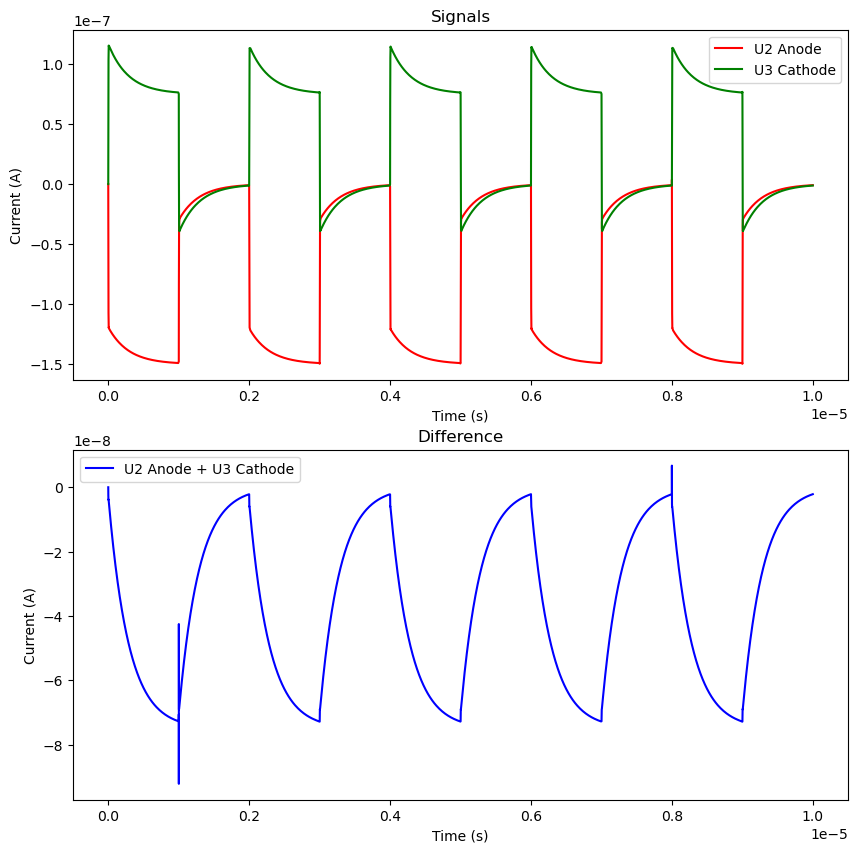

In [11]:
fig, axs = plt.subplots(2, 1, figsize=(10, 10))
axs[0].plot(pd_data['time'], pd_data['Ix(U2:Ano)'], label='U2 Anode', color='red')
axs[0].plot(pd_data['time'], pd_data['Ix(U3:Cath)'], label='U3 Cathode', color='green')
axs[0].set_title('Signals')
axs[0].set_xlabel('Time (s)')
axs[0].set_ylabel('Current (A)')
axs[0].legend()

axs[1].plot(pd_data['time'], pd_data['Ix(U3:Cath)'] + pd_data['Ix(U2:Ano)'], label='U2 Anode + U3 Cathode', color='blue')
axs[1].set_title('Difference')
axs[1].set_xlabel('Time (s)')
axs[1].set_ylabel('Current (A)')
axs[1].legend()

# Plotting the Wavefrom Data from SPICE for Paper

## Faster Electronic Discrete Circuit
### Reading the data exported from SPICE

In [5]:
# File location
file_loc_fast = 'data/OPA818 balanced PD 10MHz.txt'

# Loading the data
pd_data = pd.read_csv(file_loc_fast, sep='\t', header=0)

# Visualizing the dataframe by showing the first few elements
pd_data.head(n=10)

,time,V(n002),V(n004),V(n006)
0,0.000000e+00,0.000000,0.000351,0.000000
1,9.142857e-11,0.000005,0.000350,0.000009
2,1.828571e-10,0.000009,0.000350,0.000018
3,2.742857e-10,0.000014,0.000352,0.000027
4,3.657143e-10,0.000018,0.000354,0.000037
5,4.571429e-10,0.000023,0.000358,0.000046
6,5.485714e-10,0.000027,0.000363,0.000055
7,6.400000e-10,0.000032,0.000369,0.000064
8,9.854294e-10,0.000049,0.000430,0.000099
9,1.390847e-09,0.000070,0.000597,0.000139


### Plotting the relevant data

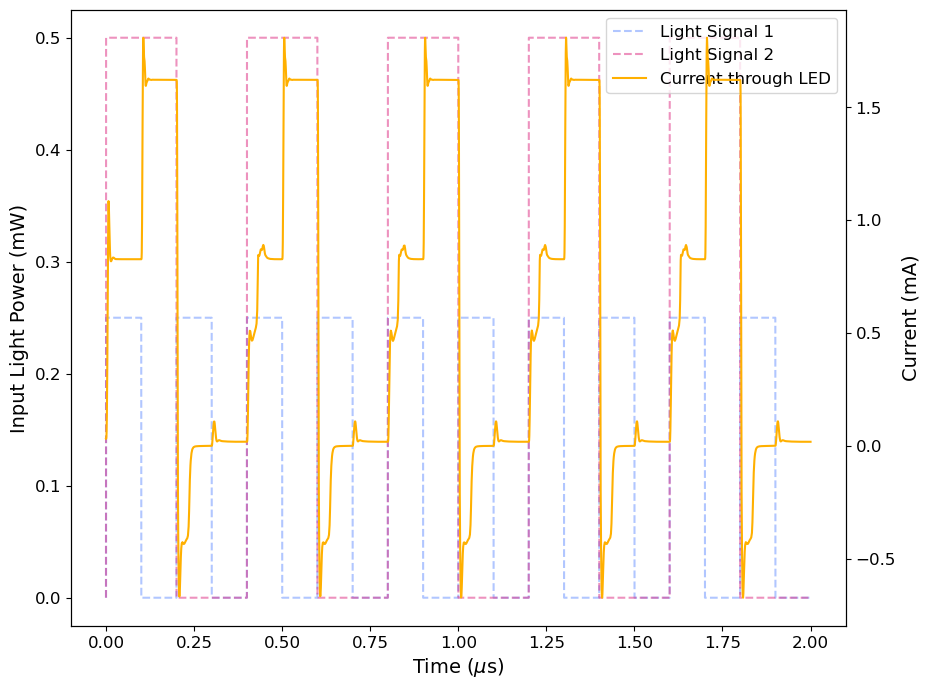

In [4]:
# Creating a new figure object
fig = plt.figure(figsize=(10, 8))
ax1 = fig.add_subplot(111)

# Plotting the data
inp_line_1, = ax1.plot(pd_data['time']*10**6, pd_data['V(n003)']*10**3, label='Light Signal 1', color='#648FFF', alpha=0.5, linestyle='--')
inp_line_2, = ax1.plot(pd_data['time']*10**6, pd_data['V(n009)']*10**3, label='Light Signal 2', color='#DC267F', alpha=0.5, linestyle='--')

# Creating a twin axis
ax2 = ax1.twinx()
out_line_1, = ax2.plot(pd_data['time']*10**6, pd_data['I(R4)']*10**3, label='Current through LED', color='#FFB000')

# Changing the tick properties
ax1.tick_params(axis='both', which='major', labelsize=12)
ax2.tick_params(axis='both', which='major', labelsize=12)

# Changing the label properties
ax1.set_xlabel(r'Time ($\mu \text{s}$)', fontsize=14)
ax1.set_ylabel(r'Input Light Power (mW)', fontsize=14)
ax2.set_ylabel(r'Current (mA)', fontsize=14)
ax1.ticklabel_format(axis='x', style='sci', scilimits=(0, 0))

# Showing the legend
lines = [inp_line_1, inp_line_2, out_line_1]
labels = [line.get_label() for line in lines]
ax1.legend(lines, labels, fontsize=12, loc='best')

# Saving the figure
# plt.savefig('output/10MHz spice square.png', transparent = True, dpi = 800, bbox_inches='tight')
# plt.savefig('output/10MHz spice square.pdf', transparent = True, bbox_inches='tight')
# plt.savefig('output/10MHz spice square.svg', transparent = True, bbox_inches='tight')

# Show the plot
plt.show()